In [1]:
import torch
from torch import nn
from torchvision import datasets, transforms

In [2]:
#define transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                               transforms.Normalize((0.5,), (0.5,)),
                               ])
#download and load the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download = True, train = True, transform = transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size = 64, shuffle = True)

In [3]:
#Build feed-forward network
model = nn.Sequential(nn.Linear(784, 128),
                     nn.ReLU(),
                     nn.Linear(128, 64),
                     nn.ReLU(),
                     nn.Linear(64, 10))

#Define the loss
criterion = nn.CrossEntropyLoss()

#get out data
images, labels = next(iter(trainloader))

#flatten the image
images = images.view(images.shape[0], -1)


#forward pass, get out logits
logits = model(images)
#calculate loss with the logits and labels
loss = criterion(logits, labels)

print(loss)

tensor(2.3045, grad_fn=<NllLossBackward>)


In [7]:
#Exercise: Build a model that returns the log-softmax as the output and calculate the loss using the negative log likelihood loss.
# Build a feed-forward network
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))

# Define the loss
criterion = nn.NLLLoss()

# Get our data
images, labels = next(iter(trainloader))
# Flatten images
images = images.view(images.shape[0], -1)

# Forward pass, get our log-probabilities
logps = model(images)
# Calculate the loss with the logps and the labels
loss = criterion(logps, labels)

print(loss)

tensor(2.3113, grad_fn=<NllLossBackward>)


In [8]:
# Autograd : automatically calculate the gradients of the tnesor
# to use the autograd, need to set requires_grad = True
x = torch.randn(2, 2, requires_grad = True)
print(x)

tensor([[-2.7158,  0.7234],
        [-0.1928,  1.0025]], requires_grad=True)


In [9]:
y = x **2
print(y)

tensor([[7.3755, 0.5233],
        [0.0372, 1.0050]], grad_fn=<PowBackward0>)


In [11]:
print(y.grad_fn)

In [12]:
z = y.mean()
print(z)

tensor(2.2352, grad_fn=<MeanBackward0>)


In [13]:
print(x.grad)

None


In [14]:
#to calculate gradient, need to run .backward()
z.backward()
print(x.grad)
print(x/2)

tensor([[-1.3579,  0.3617],
        [-0.0964,  0.5012]])
tensor([[-1.3579,  0.3617],
        [-0.0964,  0.5012]], grad_fn=<DivBackward0>)


In [16]:
#Loss and autograd together
#build feedforward network
model = nn.Sequential(nn.Linear(784, 128),
                     nn.ReLU(),
                     nn.Linear(128, 64),
                     nn.ReLU(),
                     nn.Linear(64, 10),
                     nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()
images, labels = next(iter(trainloader))
images = images.view(images.shape[0], -1)

logps = model(images)
loss = criterion(logps, labels)

In [17]:
print("Before backward pass:  \n", model[0].weight.grad)

loss.backward()

print("After backward pass:  \n", model[0].weight.grad)

Before backward pass:  
 None
After backward pass:  
 tensor([[ 0.0012,  0.0012,  0.0012,  ...,  0.0012,  0.0012,  0.0012],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [-0.0031, -0.0031, -0.0031,  ..., -0.0031, -0.0031, -0.0031],
        [ 0.0036,  0.0036,  0.0036,  ...,  0.0036,  0.0036,  0.0036],
        [ 0.0003,  0.0003,  0.0003,  ...,  0.0003,  0.0003,  0.0003]])


In [18]:
#training the network
from torch import optim

#optimizers require the parameters to optimize and a learning rate
optimizer = optim.SGD(model.parameters(), lr = 0.01)

In [20]:
print('Initial weights - ', model[0].weight)

images, labels = next(iter(trainloader))
images.resize_(64, 784)

# Clear the gradients, do this because gradients are accumulated
optimizer.zero_grad()

# Forward pass, then backward pass, then update weights
output = model(images)
loss = criterion(output, labels)
loss.backward()
print('Gradient -', model[0].weight.grad)

Initial weights -  Parameter containing:
tensor([[ 0.0308, -0.0195, -0.0037,  ..., -0.0319,  0.0041,  0.0158],
        [-0.0152,  0.0056, -0.0356,  ...,  0.0281,  0.0159,  0.0348],
        [-0.0221,  0.0226, -0.0072,  ...,  0.0261,  0.0005,  0.0056],
        ...,
        [-0.0159, -0.0182, -0.0075,  ...,  0.0279, -0.0062, -0.0266],
        [ 0.0101, -0.0251,  0.0041,  ...,  0.0110,  0.0125, -0.0234],
        [ 0.0321,  0.0058,  0.0260,  ..., -0.0278,  0.0071,  0.0222]],
       requires_grad=True)
Gradient - tensor([[ 0.0036,  0.0036,  0.0036,  ...,  0.0036,  0.0036,  0.0036],
        [-0.0004, -0.0004, -0.0004,  ..., -0.0004, -0.0004, -0.0004],
        [ 0.0005,  0.0005,  0.0005,  ...,  0.0005,  0.0005,  0.0005],
        ...,
        [ 0.0015,  0.0015,  0.0015,  ...,  0.0015,  0.0015,  0.0015],
        [ 0.0021,  0.0021,  0.0021,  ...,  0.0021,  0.0021,  0.0021],
        [-0.0021, -0.0021, -0.0021,  ..., -0.0021, -0.0021, -0.0021]])


In [21]:
#take update step and few new weigths()
optimizer.step()
print("Update model: ", model[0].weight)

Update model:  Parameter containing:
tensor([[ 0.0307, -0.0195, -0.0037,  ..., -0.0319,  0.0041,  0.0158],
        [-0.0152,  0.0056, -0.0356,  ...,  0.0281,  0.0159,  0.0348],
        [-0.0222,  0.0226, -0.0072,  ...,  0.0261,  0.0005,  0.0056],
        ...,
        [-0.0159, -0.0182, -0.0075,  ...,  0.0279, -0.0062, -0.0266],
        [ 0.0101, -0.0251,  0.0041,  ...,  0.0110,  0.0124, -0.0235],
        [ 0.0321,  0.0058,  0.0260,  ..., -0.0278,  0.0071,  0.0222]],
       requires_grad=True)


In [22]:
#training for real
#Exercise: Implement the training pass for our network. 
#If you implemented it correctly, you should see the training loss drop with each epoch.
model = nn.Sequential(nn.Linear(784, 128),
                     nn.ReLU(),
                     nn.Linear(128, 64),
                     nn.ReLU(),
                     nn.Linear(64, 10),
                     nn.LogSoftmax(dim = 1))

criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr = 0.003)


epochs = 5
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        #flatten MNOST images into a 784 long vector
        images = images.view(images.shape[0], -1)
        
        #training pass
        optimizer.zero_grad()
        
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")

Training loss: 1.9734340493104605
Training loss: 0.8776459589060436
Training loss: 0.5415091214816707
Training loss: 0.4421168570039369
Training loss: 0.3917290117186524


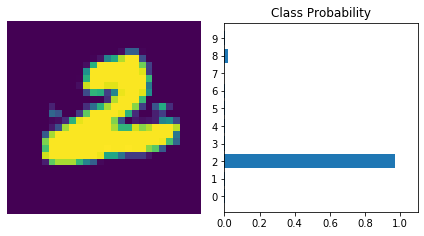

In [24]:
%matplotlib inline
import helper

images, labels = next(iter(trainloader))

img = images[0].view(1, 784)
#turn off gradients to speed up this part
with torch.no_grad():
    logps = model(img)
    
#output of the network are log_probalilities, need to take experimential for probalilities
ps = torch.exp(logps)
helper.view_classify(img.view(1, 28, 28), ps)